# Data Abstraction
Data abstraction is a powerful concept in computer science that allows programmers to treat code as objects. For example, using code to represent cars, chairs, people, and so on. That way, programmers don't have to worry about how code is implemented; they just have to know what it does.

Data abstraction mimics how we think about the world. If you want to drive a car, you don't need to know how the engine was built or what kind of material the tires are made of to do so. You just have to know how to use the car for driving itself, such as how to turn the wheel or press the gas pedal.

A data abstraction consists of two types of functions:

Constructors: functions that build the abstract data type.
Selectors: functions that retrieve information from the data type.
Programmers design data abstractions to abstract away how information is stored and calculated such that the end user does not need to know how constructors and selectors are implemented. The nature of abstraction allows whoever uses them to assume that the functions have been written correctly and work as described.

## Trees
One example of data abstraction is with trees.

In computer science, trees are recursive data structures that are widely used in various settings and can be implemented in many ways. The diagram below is an example of a tree.

Example Tree

Notice that the tree branches downward. In computer science, the root of a tree starts at the top, and the leaves are at the bottom.

Some terminology regarding trees:

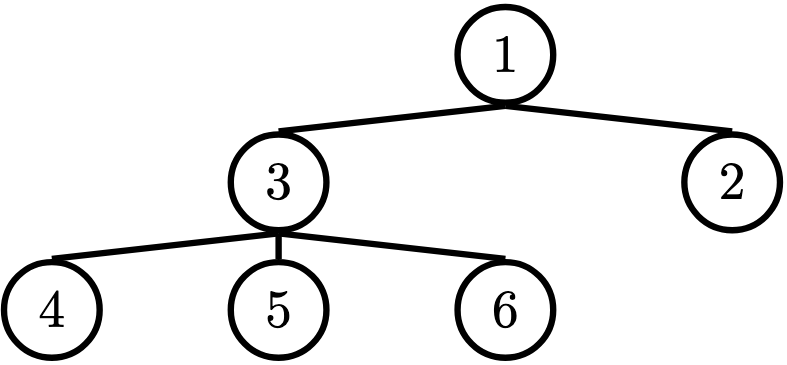


Parent Node: A node that has at least one branch.  
Child Node: A node that has a parent. A child node can only have one parent.  
Root: The top node of the tree. In our example, this is the 1 node.  
Label: The value at a node. In our example, every node's label is an integer.  
Leaf: A node that has no branches. In our example, the 4, 5, 6, 2 nodes are leaves.  
Branch: A subtree of the root. Trees have branches, which are trees themselves: this is why trees are recursive data structures.  
Depth: How far away a node is from the root. We define this as the number of edges between the root to the node. As there are no edges between the root and itself, the root has depth 0. In our example, the 3 node has depth 1 and the 4 node has depth 2.  
Height: The depth of the lowest (furthest from the root) leaf. In our example, the 4, 5, and 6 nodes are all the lowest leaves with depth 2. Thus, the entire tree has height 2.  
In computer science, there are many different types of trees. Some vary in the number of branches each node has; others vary in the structure of the tree.  

## Working with Trees
A tree has both a value for the root node and a sequence of branches, which are also trees. In our implementation, we represent the branches as a list of trees. Since a tree is a data abstraction, our choice to use lists is just an implementation detail.

The arguments to the constructor tree are the value for the root node and an optional list of branches. If no branches parameter is provided, the default value [] is used.
The selectors for these are label and branches.
Remember branches returns a list of trees and not a tree directly. It's important to distinguish between working with a tree and working with a list of trees.

We have also provided a convenience function, is_leaf.

Let's try to create the tree from above:

In [6]:
def tree(label, branches=[]):
    """Construct a tree with the given label value and a list of branches."""
    return [label] + list(branches)

def label(tree):
    """Return the label value of a tree."""
    return tree[0]

def branches(tree):
    """Return the list of branches of the given tree."""
    return tree[1:]

def is_leaf(tree):
    """Returns True if the given tree's list of branches is empty, and False
    otherwise.
    """
    return not branches(tree)

## Q1: Tree Abstraction Barrier
Consider a tree t constructed by calling tree(1, [tree(2), tree(4)]). For each of the following expressions, answer these two questions:

What does the expression evaluate to?
Does the expression violate any abstraction barriers? If so, write an equivalent expression that does not violate abstraction barriers.

In [18]:
t = tree(1, [tree(2), tree(4)])

In [21]:
print(label(t))
print(t[0])
print(label(branches(t)[0]))
print(is_leaf(t[1:][1]))
print([label(b) for b in branches(t)])
print(branches(tree(5, [t, tree(3)]))[0][0])
print(branches(tree(5, [t, tree(3)]))[0])

1
1
2
True
[2, 4]
1
[1, [2], [4]]


## Q2: Height
Write a function that returns the height of a tree. Recall that the height of a tree is the length of the longest path from the root to a leaf.

In [41]:
def height(t):
    """Return the height of a tree.

    >>> t = tree(3, [tree(5, [tree(1)]), tree(2)])
    >>> height(t)
    2
    >>> t = tree(3, [tree(1), tree(2, [tree(5, [tree(6)]), tree(1)])])
    >>> height(t)
    3
    """
    if is_leaf(t):
        return 0
    else:
        return 1 + max(height(sub_t) for sub_t in branches(t))
import doctest
print(doctest.testmod())
print(height(tree(3, [tree(5, [tree(1)]), tree(2)])))
print(height(tree(3, [tree(1), tree(2, [tree(5, [tree(6)]), tree(1)])])))

TestResults(failed=0, attempted=6)
2
3


## Q3: Maximum Path Sum
Write a function that takes in a tree and returns the maximum sum of the values along any path in the tree. Recall that a path is from the tree's root to any leaf.

In [48]:
def max_path_sum(t):
    """Return the maximum path sum of the tree.

    >>> t = tree(1, [tree(5, [tree(1), tree(3)]), tree(10)])
    >>> max_path_sum(t)
    11
    """
    if is_leaf(t):
        return label(t)
    else:
        return label(t) + max(max_path_sum(sub_t) for sub_t in branches(t))
    
import doctest
print(doctest.testmod())
t = tree(1, [tree(5, [tree(1), tree(3)]), tree(10)])
print(max_path_sum(t))


TestResults(failed=0, attempted=6)
11


# Q4: Find Path
Write a function that takes in a tree and a value x and returns a list containing the nodes along the path required to get from the root of the tree to a node containing x.

If x is not present in the tree, return None. Assume that the entries of the tree are unique.

For the following tree, find_path(t, 5) should return [2, 7, 6, 5]

Example Tree
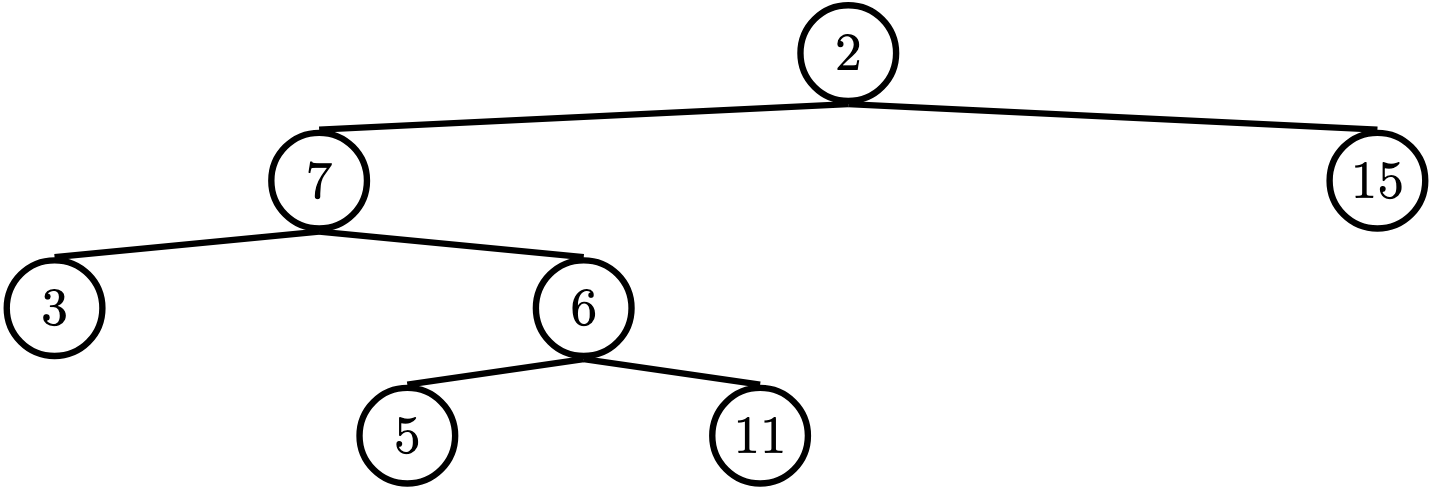


In [96]:
def find_path(t, x):
    """
    >>> t = tree(2, [tree(7, [tree(3), tree(6, [tree(5), tree(11)])] ), tree(15)])
    >>> find_path(t, 5)
    [2, 7, 6, 5]
    >>> find_path(t, 10)  # returns None
    """
    if is_leaf(t) or label(t) == x:
        return [label(t)]
    for i in branches(t):
        #print([label(t)], find_path(i, x))
        path = find_path(i, x) if find_path(i, x) else [0]
        if path[-1] == x:
            return [label(t)] + path

import doctest
print(doctest.testmod())
t = tree(2, [tree(7, [tree(3), tree(6, [tree(5), tree(11)])] ), tree(15)])
print(find_path(t, 10))

TestResults(failed=0, attempted=9)
None


## Q5: Perfectly Balanced
Part A: Implement sum_tree, which returns the sum of all the labels in tree t.

Part B: Implement balanced, which returns whether every branch of t has the same total sum and that the branches themselves are also balanced.

Challenge: Solve both of these parts with just 1 line of code each.

In [101]:
def sum_tree(t):
    """
    Add all elements in a tree.
    >>> t = tree(4, [tree(2, [tree(3)]), tree(6)])
    >>> sum_tree(t)
    15
    """
    return label(t) + sum([sum_tree(i) for i in branches(t)])


import doctest
print(doctest.testmod())
t = t = tree(4, [tree(2, [tree(3)]), tree(6)])
print(sum_tree(t))

TestResults(failed=0, attempted=11)
15


In [108]:
def balanced(t):
    """
    Checks if each branch has same sum of all elements and
    if each branch is balanced.
    >>> t = tree(1, [tree(3), tree(1, [tree(2)]), tree(1, [tree(1), tree(1)])])
    >>> balanced(t)
    True
    >>> t = tree(1, [t, tree(1)])
    >>> balanced(t)
    False
    >>> t = tree(1, [tree(4), tree(1, [tree(2), tree(1)]), tree(1, [tree(3)])])
    >>> balanced(t)
    False
    """

    branc = branches(t)
    sum = [sum_tree(_) for _ in branc]
    
    for _ in range(len(sum)):
        if sum[0] != sum[_] or not balanced(branc[_]):
            return False
    return True


import doctest
print(doctest.testmod())
t = tree(1, [tree(4), tree(1, [tree(2), tree(1)]), tree(1, [tree(3)])])
#print(balanced(t))


TestResults(failed=0, attempted=17)
False


## Q6: Sprout Leaves
Define a function sprout_leaves that takes in a tree, t, and a list of leaves, leaves. It produces a new tree that is identical to t, but where each old leaf node has new branches, one for each leaf in leaves.

For example, say we have the tree t = tree(1, [tree(2), tree(3, [tree(4)])]):

In [109]:
def sprout_leaves(t, leaves):
    """Sprout new leaves containing the data in leaves at each leaf in
    the original tree t and return the resulting tree.

    >>> t1 = tree(1, [tree(2), tree(3)])
    >>> print_tree(t1)
    1
      2
      3
    >>> new1 = sprout_leaves(t1, [4, 5])
    >>> print_tree(new1)
    1
      2
        4
        5
      3
        4
        5

    >>> t2 = tree(1, [tree(2, [tree(3)])])
    >>> print_tree(t2)
    1
      2
        3
    >>> new2 = sprout_leaves(t2, [6, 1, 2])
    >>> print_tree(new2)
    1
      2
        3
          6
          1
          2
    """
    "*** YOUR CODE HERE ***"

